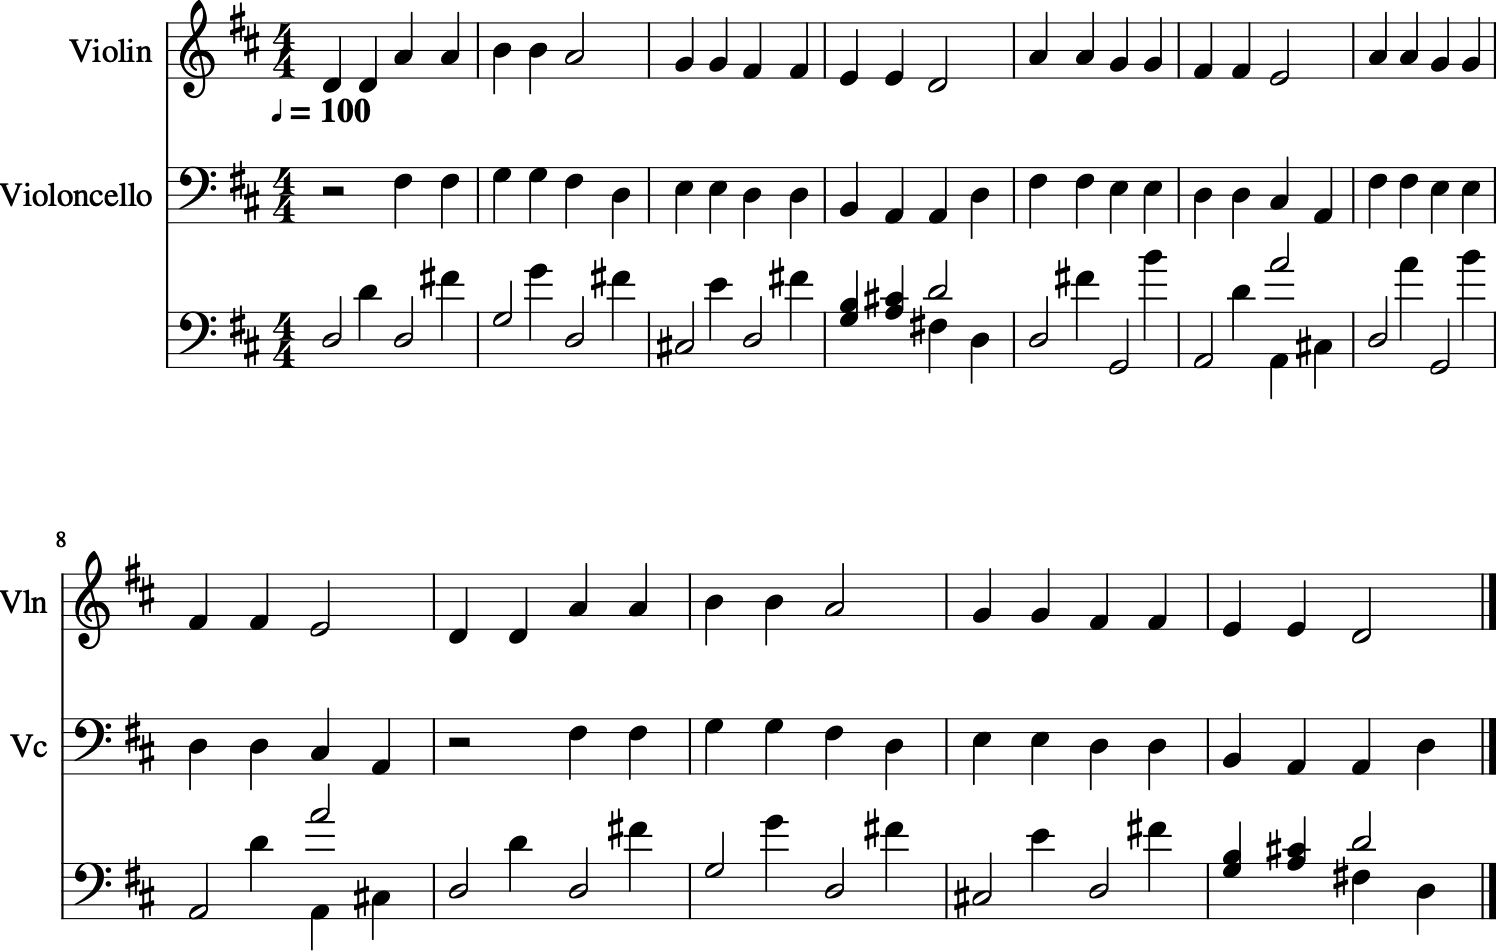

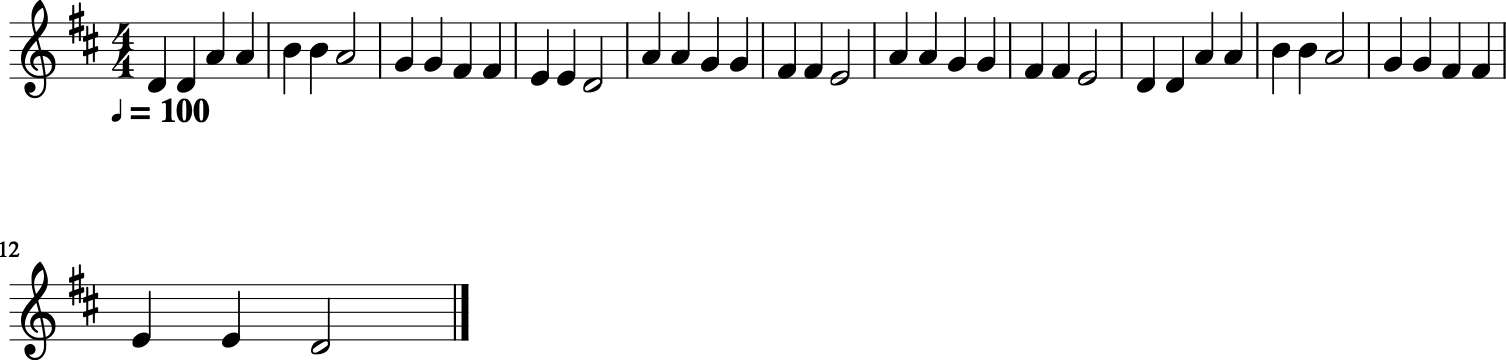

In [37]:
from music21 import *

nocturne = converter.parse('twinkle_twinkle_PNOTR.mid')
nocturne.show()
notes_to_parse = nocturne.parts[0].recurse()
notes_to_parse.show()
pitch = []
quarterLength = []
for element in notes_to_parse:
    if isinstance(element, note.Note):
        pitch.append(int(element.pitch.ps))
        quarterLength.append(float(round(element.quarterLength,6)))

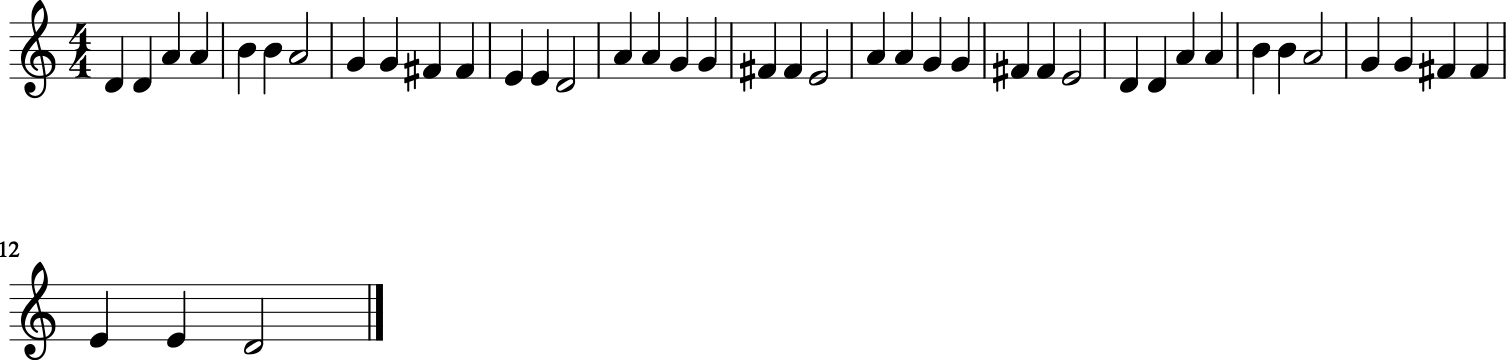

'test2.mid'

In [10]:
s2 = stream.Stream()

for n in range(len(pitch)):
    curnote = pitch[n]
    length=quarterLength[n]
    n = note.Note(midi=curnote,quarterLength = length)

    s2.append(n)

s2.show()
s2.write("midi","test2.mid")

In [11]:
!python3 play.py "test2.mid"

pygame 2.0.0.dev4 (SDL 2.0.10, python 3.7.1)
Hello from the pygame community. https://www.pygame.org/contribute.html
Music file test2.mid loaded!


In [12]:
print(pitch)
print(quarterLength)

[62, 62, 69, 69, 71, 71, 69, 67, 67, 66, 66, 64, 64, 62, 69, 69, 67, 67, 66, 66, 64, 69, 69, 67, 67, 66, 66, 64, 62, 62, 69, 69, 71, 71, 69, 67, 67, 66, 66, 64, 64, 62]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0]


In [13]:
notes = []
for i in range(len(pitch)):
    notes.append([pitch[i],quarterLength[i]])
print(notes)

[[62, 1.0], [62, 1.0], [69, 1.0], [69, 1.0], [71, 1.0], [71, 1.0], [69, 2.0], [67, 1.0], [67, 1.0], [66, 1.0], [66, 1.0], [64, 1.0], [64, 1.0], [62, 2.0], [69, 1.0], [69, 1.0], [67, 1.0], [67, 1.0], [66, 1.0], [66, 1.0], [64, 2.0], [69, 1.0], [69, 1.0], [67, 1.0], [67, 1.0], [66, 1.0], [66, 1.0], [64, 2.0], [62, 1.0], [62, 1.0], [69, 1.0], [69, 1.0], [71, 1.0], [71, 1.0], [69, 2.0], [67, 1.0], [67, 1.0], [66, 1.0], [66, 1.0], [64, 1.0], [64, 1.0], [62, 2.0]]


In [14]:
import numpy as np

from htm.bindings.sdr import SDR
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters
from htm.algorithms import SpatialPooler as SP
from htm.algorithms import TemporalMemory as TM
from htm.bindings.algorithms import Classifier
from htm.bindings.algorithms import Predictor

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [15]:
scalarEncoderParams_1 = ScalarEncoderParameters()
scalarEncoderParams_1.minimum = 48
scalarEncoderParams_1.maximum = 83
scalarEncoderParams_1.activeBits = 3
scalarEncoderParams_1.size = 24
scalarEncoderParams_1.clipInput  = True

enc_1 = ScalarEncoder(scalarEncoderParams_1)
print(enc_1.encode(65))
print(enc_1.encode(71))

SDR( 24 ) 10, 11, 12
SDR( 24 ) 14, 15, 16


In [16]:
scalarEncoderParams_2 = ScalarEncoderParameters()
scalarEncoderParams_2.minimum = 0
scalarEncoderParams_2.maximum = 1
scalarEncoderParams_2.activeBits = 3
scalarEncoderParams_2.size = 24
scalarEncoderParams_2.clipInput  = True

enc_2 = ScalarEncoder(scalarEncoderParams_2)
print(enc_2.encode(0.25))
print(enc_2.encode(0.333333))
print(enc_2.encode(0.5))

SDR( 24 ) 5, 6, 7
SDR( 24 ) 7, 8, 9
SDR( 24 ) 10, 11, 12


In [17]:
#print(note[0][0],note[0][1]) 
for i in range(len(notes)):
    # エンコーダを呼び出して、各値のビット表現を作成します。 これらは SDR オブジェクトです.
    pitchBits        = enc_1.encode(notes[i][0])
    quarterLengthBits = enc_2.encode(notes[i][1])

    # これらのすべてのエンコーディングを 1 つの大きなエンコーディングに連結して、
    # 空間プーリング用に使用します.
    encoding = SDR( dimensions = (48, ) ).concatenate([pitchBits, pitchBits])
    print(encoding)

SDR( 48 ) 8, 9, 10, 32, 33, 34
SDR( 48 ) 8, 9, 10, 32, 33, 34
SDR( 48 ) 13, 14, 15, 37, 38, 39
SDR( 48 ) 13, 14, 15, 37, 38, 39
SDR( 48 ) 14, 15, 16, 38, 39, 40
SDR( 48 ) 14, 15, 16, 38, 39, 40
SDR( 48 ) 13, 14, 15, 37, 38, 39
SDR( 48 ) 11, 12, 13, 35, 36, 37
SDR( 48 ) 11, 12, 13, 35, 36, 37
SDR( 48 ) 11, 12, 13, 35, 36, 37
SDR( 48 ) 11, 12, 13, 35, 36, 37
SDR( 48 ) 10, 11, 12, 34, 35, 36
SDR( 48 ) 10, 11, 12, 34, 35, 36
SDR( 48 ) 8, 9, 10, 32, 33, 34
SDR( 48 ) 13, 14, 15, 37, 38, 39
SDR( 48 ) 13, 14, 15, 37, 38, 39
SDR( 48 ) 11, 12, 13, 35, 36, 37
SDR( 48 ) 11, 12, 13, 35, 36, 37
SDR( 48 ) 11, 12, 13, 35, 36, 37
SDR( 48 ) 11, 12, 13, 35, 36, 37
SDR( 48 ) 10, 11, 12, 34, 35, 36
SDR( 48 ) 13, 14, 15, 37, 38, 39
SDR( 48 ) 13, 14, 15, 37, 38, 39
SDR( 48 ) 11, 12, 13, 35, 36, 37
SDR( 48 ) 11, 12, 13, 35, 36, 37
SDR( 48 ) 11, 12, 13, 35, 36, 37
SDR( 48 ) 11, 12, 13, 35, 36, 37
SDR( 48 ) 10, 11, 12, 34, 35, 36
SDR( 48 ) 8, 9, 10, 32, 33, 34
SDR( 48 ) 8, 9, 10, 32, 33, 34
SDR( 48 ) 13, 14, 15

In [18]:
inputSDR  = SDR( dimensions = (48, ) )
activeSDR = SDR( dimensions = (576,) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

In [19]:
tm = TM(
    columnDimensions = (576,),
    cellsPerColumn=8,
    initialPermanence=0.5,
    connectedPermanence=0.5,
    minThreshold=8,
    maxNewSynapseCount=20,
    permanenceIncrement=0.1,
    permanenceDecrement=0.0,
    activationThreshold=8,
)

In [20]:
seq=notes
predictor_1 = Predictor( steps=[1,2,3,4,5,6,7], alpha=0.1)
resolution = 1
minimum = 48
predictor_2 = Predictor( steps=[1,2,3,4,5,6,7], alpha=0.1)
resolution = 0.01
minimum = 0

In [21]:
predictions_1 = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
predictions_2 = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
for j in range(5):
    for i in range(len(seq)):
        pitchBits        = enc_1.encode(seq[i][0])
        quarterLengthBits = enc_2.encode(seq[i][1])

        encoding = SDR( dimensions = (48, ) ).concatenate([pitchBits, pitchBits])
        inputSDR = encoding
        sp.compute(inputSDR, True, activeSDR)

        tm.compute( activeSDR, learn=True)

        predictor_1.learn(i+len(seq)*j, tm.getActiveCells() , int((seq[i][0] - minimum) / resolution))

        pdf_1 = predictor_1.infer( tm.getActiveCells() )
        for n in (1,2,3,4,5,6,7):
            if pdf_1[n]:
                predictions_1[n].append( np.argmax( pdf_1[n] ) * resolution + minimum )
            else:
                predictions_1[n].append(float('nan'))
        
        predictor_2.learn(i+len(seq)*j, tm.getActiveCells() , int((seq[i][1] - minimum) / resolution))

        pdf_2 = predictor_2.infer( tm.getActiveCells() )
        for m in (1,2,3,4,5,6,7):
            if pdf_2[m]:
                predictions_2[m].append( np.argmax( pdf_2[m] ) * resolution + minimum )
            else:
                predictions_2[m].append(float('nan'))
                
print(predictions_1)
print(predictions_2)

{1: [nan, 62.0, 0.0, 69.0, 71.0, 71.0, 71.0, 69.0, 67.0, 66.0, 66.0, 69.0, 64.0, 69.0, 66.0, 69.0, 66.0, 67.0, 66.0, 66.0, 64.0, 69.0, 67.0, 67.0, 66.0, 66.0, 66.0, 66.0, 69.0, 62.0, 69.0, 67.0, 69.0, 69.0, 69.0, 67.0, 66.0, 66.0, 66.0, 66.0, 67.0, 62.0, 62.0, 62.0, 69.0, 69.0, 71.0, 69.0, 67.0, 67.0, 66.0, 66.0, 66.0, 64.0, 62.0, 62.0, 69.0, 71.0, 67.0, 66.0, 66.0, 66.0, 64.0, 69.0, 67.0, 67.0, 67.0, 66.0, 66.0, 64.0, 62.0, 69.0, 69.0, 67.0, 71.0, 69.0, 67.0, 67.0, 64.0, 66.0, 66.0, 64.0, 64.0, 62.0, 69.0, 69.0, 69.0, 67.0, 71.0, 69.0, 67.0, 67.0, 64.0, 66.0, 66.0, 62.0, 64.0, 62.0, 69.0, 71.0, 67.0, 64.0, 66.0, 66.0, 64.0, 67.0, 67.0, 67.0, 67.0, 66.0, 66.0, 64.0, 62.0, 69.0, 69.0, 67.0, 71.0, 69.0, 67.0, 67.0, 64.0, 66.0, 66.0, 62.0, 64.0, 62.0, 69.0, 69.0, 69.0, 71.0, 71.0, 69.0, 67.0, 67.0, 64.0, 66.0, 66.0, 62.0, 64.0, 62.0, 69.0, 71.0, 67.0, 64.0, 66.0, 66.0, 64.0, 69.0, 67.0, 64.0, 67.0, 66.0, 66.0, 69.0, 62.0, 69.0, 69.0, 71.0, 71.0, 69.0, 67.0, 67.0, 64.0, 66.0, 66.0, 62.0, 6

In [30]:
test=[[62, 0.5], [62, 0.5], [69, 0.5], [69, 0.5], [70, 0.5], [71, 0.5], [69, 1]]
predictions_1 = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
predictions_2 = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}

for i in range(len(test)):
    pitchBits        = enc_1.encode(test[i][0])
    quarterLengthBits = enc_2.encode(test[i][1])

    encoding = SDR( dimensions = (48, ) ).concatenate([pitchBits, pitchBits])
    inputSDR = encoding
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=False)

    pdf_1 = predictor_1.infer( tm.getActiveCells() )
    for n in (1,2,3,4,5,6,7):
        if pdf_1[n]:
            predictions_1[n].append( np.argmax( pdf_1[n] ) * resolution + minimum )
        else:
            predictions_1[n].append(float('nan'))

    pdf_2 = predictor_2.infer( tm.getActiveCells() )
    for m in (1,2,3,4,5,6,7):
        if pdf_2[m]:
            predictions_2[m].append( np.argmax( pdf_2[m] ) * resolution + minimum )
        else:
            predictions_2[m].append(float('nan'))
                
print(predictions_1)
print(predictions_2)

{1: [62.0, 69.0, 69.0, 71.0, 67.0, 69.0, 67.0], 2: [69.0, 69.0, 71.0, 71.0, 67.0, 67.0, 67.0], 3: [69.0, 71.0, 71.0, 69.0, 66.0, 67.0, 66.0], 4: [71.0, 71.0, 69.0, 67.0, 66.0, 66.0, 66.0], 5: [71.0, 69.0, 67.0, 67.0, 64.0, 66.0, 64.0], 6: [69.0, 67.0, 67.0, 66.0, 66.0, 64.0, 64.0], 7: [67.0, 67.0, 66.0, 66.0, 62.0, 64.0, 62.0]}
{1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 3: [1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0], 5: [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], 6: [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


In [31]:
next_prediction_1=[]
for i in range(len(test)):
    next_prediction_1.append(predictions_1[i+1][len(test)-1]) 
print(next_prediction_1)

next_prediction_2=[]
for i in range(len(test)):
    next_prediction_2.append(predictions_2[i+1][len(test)-1]) 
print(next_prediction_2)

[67.0, 67.0, 66.0, 66.0, 64.0, 64.0, 62.0]
[1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0]


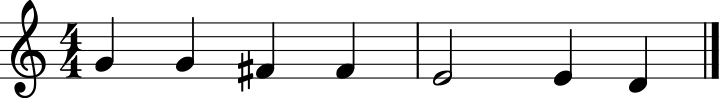

'test3.mid'

In [32]:
s3 = stream.Stream()

for n in range(len(next_prediction_1)):
    curnote = next_prediction_1[n]
    length=next_prediction_2[n]
    n = note.Note(midi=curnote,quarterLength = length)

    s3.append(n)

s3.show()
s3.write("midi","test3.mid")

In [33]:
!python3 play.py "test3.mid"

pygame 2.0.0.dev4 (SDL 2.0.10, python 3.7.1)
Hello from the pygame community. https://www.pygame.org/contribute.html
Music file test3.mid loaded!
